# Clasificación Facial
## Importación de librerías y carga de datos

In [1]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.datasets import fetch_lfw_people

#Carga de datos de caras
faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


## Visualización de ejemplos de la base de datos

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(60):
    ax = fig.add_subplot(5, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [3]:
#Selección de los subconjuntos de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)
print(X_train.shape, X_test.shape)

#Descomposición tipo PCA
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

(1011, 2914) (337, 2914)


PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

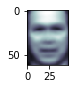

In [4]:
#Impresión de la la primera dimensión
plt.figure(figsize=(1,1))
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)

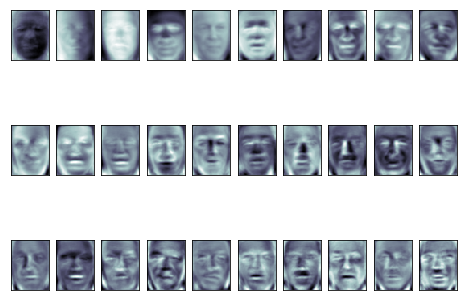

In [5]:
#impresión de las primeras 30 componentes principales
fig = plt.figure(figsize=(8, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    

In [6]:
#creación de las nuevas caracteristicas usando PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(1011, 150)


## Clasificador mediante Redes Neuronales (Sin análisis de componentes principales)

In [7]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(50), random_state=1,
                                        verbose=0, max_iter=5000)

clf.fit(X_train, y_train)

 #Entrenamiento usando redes neuronales y características originales
from sklearn import metrics
y_pred = clf.predict(X_test)
print('SIN PCA')
print(metrics.classification_report(y_test, y_pred)) #Métrica de precición 
print(metrics.confusion_matrix(y_test, y_pred)) #Métrica matriz de confusión

SIN PCA
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        16
          1       0.00      0.00      0.00        61
          2       0.00      0.00      0.00        35
          3       0.00      0.00      0.00       125
          4       0.00      0.00      0.00        29
          5       0.06      1.00      0.11        19
          6       0.00      0.00      0.00        17
          7       0.00      0.00      0.00        35

avg / total       0.00      0.06      0.01       337

[[  0   0   0   0   0  16   0   0]
 [  0   0   0   0   0  61   0   0]
 [  0   0   0   0   0  35   0   0]
 [  0   0   0   0   0 125   0   0]
 [  0   0   0   0   0  29   0   0]
 [  0   0   0   0   0  19   0   0]
 [  0   0   0   0   0  17   0   0]
 [  0   0   0   0   0  35   0   0]]


C:\Users\Sergio\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


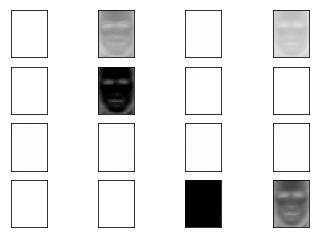

In [8]:
#Impresión de pesos de la primera capa oculta de la red neuronal
fig, axes = plt.subplots(4, 4)
# uso de mínimo y máximo globales para asegurar la misma escala
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(62, 47), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [9]:
## Clasificador mediante Redes Neuronales (Con análisis de componentes principales)

CON PCA
             precision    recall  f1-score   support

          0       0.80      0.50      0.62        16
          1       0.80      0.79      0.79        61
          2       0.63      0.69      0.66        35
          3       0.84      0.94      0.89       125
          4       0.68      0.59      0.63        29
          5       1.00      0.58      0.73        19
          6       0.88      0.82      0.85        17
          7       0.65      0.69      0.67        35

avg / total       0.79      0.78      0.78       337

[[  8   4   2   1   0   0   0   1]
 [  1  48   4   2   1   0   1   4]
 [  1   3  24   6   0   0   0   1]
 [  0   1   3 118   1   0   0   2]
 [  0   1   2   5  17   0   1   3]
 [  0   2   0   3   1  11   0   2]
 [  0   0   0   2   1   0  14   0]
 [  0   1   3   3   4   0   0  24]]


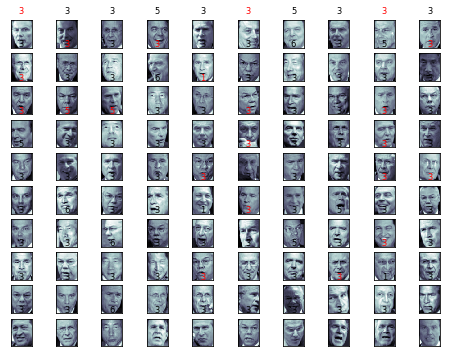

In [10]:
#Entrenamiento usando redes neuronales y características PCA
clf = MLPClassifier(solver='sgd', alpha=1e-4, hidden_layer_sizes=(50), random_state=1,
                    verbose=0, max_iter=5000)
clf.fit(X_train_pca, y_train)

import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)
    
y_pred = clf.predict(X_test_pca)
print('CON PCA')
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

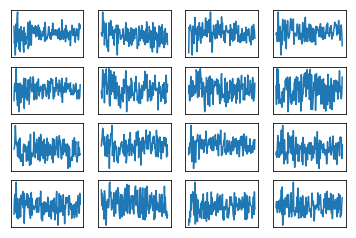

In [11]:
#Impresión de pesos de la primera capa oculta de la red neuronal
fig, axes = plt.subplots(4, 4)
# uso de mínimo y máximo globales para asegurar la misma escala
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.plot(coef)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

## Clasificador mediante SVC (Support Vector Classification)

             precision    recall  f1-score   support

          0       0.59      0.81      0.68        16
          1       0.87      0.77      0.82        61
          2       0.72      0.83      0.77        35
          3       0.85      0.88      0.87       125
          4       0.68      0.72      0.70        29
          5       0.71      0.63      0.67        19
          6       0.87      0.76      0.81        17
          7       0.86      0.71      0.78        35

avg / total       0.81      0.80      0.80       337

[[ 13   2   1   0   0   0   0   0]
 [  6  47   1   4   0   1   0   2]
 [  0   1  29   4   1   0   0   0]
 [  0   2   7 110   3   1   0   2]
 [  1   0   1   4  21   0   2   0]
 [  0   1   0   2   4  12   0   0]
 [  0   0   0   2   0   2  13   0]
 [  2   1   1   3   2   1   0  25]]


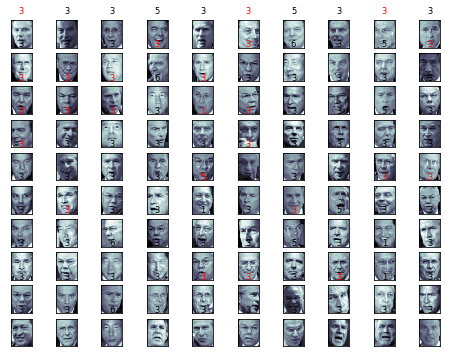

In [12]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear', C = 1)
clf.fit(X_train, y_train)
    
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)
    
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

## Conclusiones 

La precisión obtenida en el entrenamiento de cada uno de los modelos es la siguiente:
- Redes Neuronales sin PCA (0.0)
- Redes Neuronales con PCA (0.79)
- SVC (Support Vector Classification (0.81)

Como se puede observar por los resultados, el modelo de redes de neuronas sin PCA no es capaz de predecir ninguna de las caras correctamente, mientras que si se reduce la dimensionalidad mediante el análisis de los componente principales (PCA) el resultado se aproxima al más alto de los tres modelos, que es el clasificador mediante SVC con 81% de aciertos.

Los resultados, aun siendo aceptables, no pueden garantizar el reconocimiento facial de todos los sujetos presentes en las imágenes. Es muy posible que alguno de los siguientes problemas detectados en el dataset de imágenes sean los responsables de esto:

- Baja resolución de las imágenes. Más pixeles significa más información, y por tanto, mejor aprendizaje.
- Imágenes en blanco y negro. Las imágenes en blanco y negro penalizan el reconocimiento facial cuando el tono de piel del sujeto es oscuro o la fotografía se ha tomado a contraluz, produciendo sombra y oscureciendo el resultado final.
- Bajo número de imágenes en el dataset. Aumentando el dataset, junto con los dos puntos anteriores, conseguirían mejorar el resultado de la predicción sin modificar los parámetros del clasificador.